In [1]:
import sys
sys.path.append('../wamuu')
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from instance import Instance
from utils import sweep_groups, sort_group_by_subst_dist, prim, get_turb_out_power

In [2]:
I = Instance(
    instance_dir='../data/raw',
    instance='n50_s01_t01_w01'
)

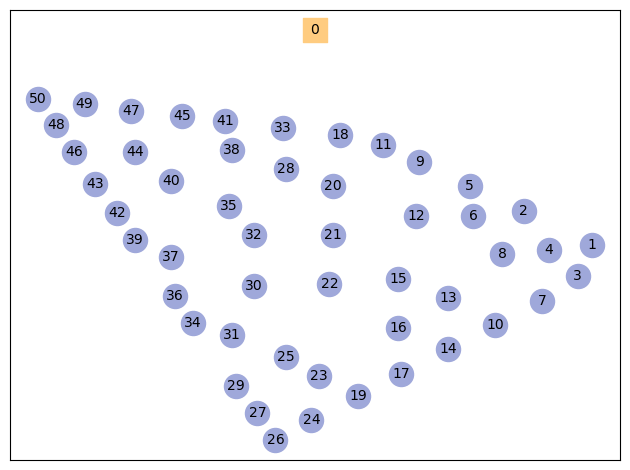

In [3]:
G = nx.DiGraph()
for i in range(I.n+1):
    G.add_node(i, pos=I.nodes[i])
pos = nx.get_node_attributes(G, 'pos')
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0],
                       node_color='#FFCC80',
                       node_shape='s')
nx.draw_networkx_nodes(G, pos,
                       nodelist=range(1, I.n+1),
                       node_color='#9FA8DA')
nx.draw_networkx_labels(G, pos,
                        font_size=10)
plt.tight_layout()
plt.show()

In [4]:
groups = sweep_groups(I.n,
                      starting_index=9,
                      clockwise=True,
                      tpg = I.n//I.C + 1)
groups = [sort_group_by_subst_dist(group, I.dist) for group in groups]

In [5]:
edges_group = [prim(group, I.dist, group[0]) for group in groups]

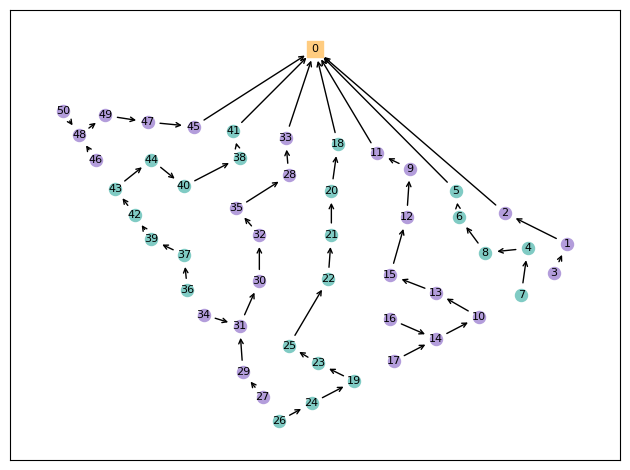

In [6]:
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0],
                       node_color='#FFCC80',
                       node_size=120,
                       node_shape='s')
color = ['#B39DDB', '#80CBC4']
for i in range(len(groups)):
    nx.draw_networkx_nodes(G, pos,
                           nodelist=groups[i],
                           node_color=color[i%2],
                           node_shape='.')
edgelist = []
for edges in edges_group:
    edgelist.extend(edges)
for group in groups:
    edgelist.append([group[0], 0])
nx.draw_networkx_edges(G, pos,
                       edgelist,
                       arrowstyle='->',
                       arrowsize=8)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.tight_layout()
plt.show()

In [7]:
powers = [get_turb_out_power(groups[i], edges_group[i]) for i in range(len(groups))]
power = dict()
for p in powers:
    power |= p
print(power)

{2: 3, 1: 2, 3: 1, 5: 5, 6: 4, 8: 3, 4: 2, 7: 1, 11: 9, 9: 8, 12: 7, 15: 6, 13: 5, 16: 1, 10: 4, 14: 3, 17: 1, 18: 9, 20: 8, 21: 7, 22: 6, 25: 5, 23: 4, 19: 3, 24: 2, 26: 1, 33: 9, 28: 8, 35: 7, 32: 6, 30: 5, 34: 1, 31: 4, 29: 2, 27: 1, 41: 9, 38: 8, 44: 6, 40: 7, 43: 5, 42: 4, 39: 3, 37: 2, 36: 1, 45: 6, 47: 5, 49: 4, 48: 3, 50: 1, 46: 1}


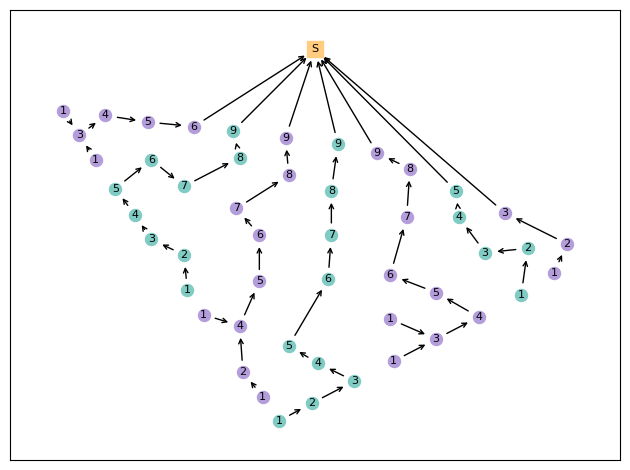

In [8]:
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0],
                       node_color='#FFCC80',
                       node_size=120,
                       node_shape='s')
color = ['#B39DDB', '#80CBC4']
for i in range(len(groups)):
    nx.draw_networkx_nodes(G, pos,
                           nodelist=groups[i],
                           node_color=color[i%2],
                           node_shape='.')
edgelist = []
for edges in edges_group:
    edgelist.extend(edges)
for group in groups:
    edgelist.append([group[0], 0])
nx.draw_networkx_edges(G, pos,
                       edgelist,
                       arrowstyle='->',
                       arrowsize=8)
nx.draw_networkx_labels(G, pos,
                        font_size=8,
                        labels=power|{0: 'S'})
plt.tight_layout()
plt.show()